**1. Import relevant packages**

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import models
!pip install torch-summary==1.4.4 

import torch.nn as nn
import torch

import numpy as np 
from matplotlib import pyplot as plt 
import matplotlib.ticker as mticker

import pandas as pd


import utilities
import read_data
import prototypical_network
import train_and_evaluation

**2. Get computational device**

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cpu


**3. Download pre-trained model**

In [3]:
################################# DenseNet121 ########################################

densenet121_model = models.densenet121(pretrained=True)

**3a. Model architecture**

In [4]:
################################ DenseNet121 ##########################################

densenet121_model = densenet121_model.to(device)
print(densenet121_model)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

**3b. Summarize model**

In [6]:
# ################################# DenseNet121 ##################################

# you need torch-summary==1.4.4 to be able to summarize DenseNet121 model
# !pip install torch-summary==1.4.4
# summary(densenet121_model, (3, 224, 244), device=device)

**4. Explore model layers and their child modules**

The following cell allows you to check out the names of the main modules that make up each model. Run one model at a time and comment out code for the other two.

In [7]:
# ########################## DenseNet121 #############################
for name, module in densenet121_model.named_modules():
     print(name)


features
features.conv0
features.norm0
features.relu0
features.pool0
features.denseblock1
features.denseblock1.denselayer1
features.denseblock1.denselayer1.norm1
features.denseblock1.denselayer1.relu1
features.denseblock1.denselayer1.conv1
features.denseblock1.denselayer1.norm2
features.denseblock1.denselayer1.relu2
features.denseblock1.denselayer1.conv2
features.denseblock1.denselayer2
features.denseblock1.denselayer2.norm1
features.denseblock1.denselayer2.relu1
features.denseblock1.denselayer2.conv1
features.denseblock1.denselayer2.norm2
features.denseblock1.denselayer2.relu2
features.denseblock1.denselayer2.conv2
features.denseblock1.denselayer3
features.denseblock1.denselayer3.norm1
features.denseblock1.denselayer3.relu1
features.denseblock1.denselayer3.conv1
features.denseblock1.denselayer3.norm2
features.denseblock1.denselayer3.relu2
features.denseblock1.denselayer3.conv2
features.denseblock1.denselayer4
features.denseblock1.denselayer4.norm1
features.denseblock1.denselayer4.rel

The following 3 cells allows you to explore the layers and child modules of a model. In order to freeze and unfreeze the correct layers of a model you need to know in detail how each model architecture is laid out and the best way to access each layer.

Since the architectures are complex (e.g. the DenseNet121 model), you will need to decide what you consider as a "layer".

In [11]:
# DenseNet121 --> check names of modules
print(f"---Main modules---:")
for name, module in densenet121_model.named_children():
    print(name)


for name, child_module in densenet121_model.named_children():
    if name == "features":
        for n, m in child_module.named_children():
            #print(n)
            if n == "denseblock4":
                for x, y in m.named_children():
                    #print(x)
                    if x in ["denselayer15", "denselayer16"]:
                        for param in y.parameters():
                            print(x, y)

---Main modules---:
features
classifier
denselayer15 _DenseLayer(
  (norm1): BatchNorm2d(960, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU(inplace=True)
  (conv1): Conv2d(960, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU(inplace=True)
  (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
)
denselayer15 _DenseLayer(
  (norm1): BatchNorm2d(960, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU(inplace=True)
  (conv1): Conv2d(960, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU(inplace=True)
  (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
)
denselayer15 _DenseLayer(
  (norm1): BatchNorm2d(960, eps=1e-05, momentum=0.1, affine=

**5. Freeze all the layers of the model**

In the following cell, comment out code for models you are not using.

In [13]:
######################### DenseNet121 ##############################
for param in densenet121_model.parameters():
    param.requires_grad = False

**5a. Flatten outputs from the Convolutional base networks and remove the Linear layers**

In [15]:
###################################### DenseNet121 ####################################

densenet121_model.classifier = nn.Flatten()
summary(densenet121_model, (3, 224, 224), device=device)

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 1024, 7, 7]          --
|    └─Conv2d: 2-1                       [-1, 64, 112, 112]        (9,408)
|    └─BatchNorm2d: 2-2                  [-1, 64, 112, 112]        (128)
|    └─ReLU: 2-3                         [-1, 64, 112, 112]        --
|    └─MaxPool2d: 2-4                    [-1, 64, 56, 56]          --
|    └─_DenseBlock: 2-5                  [-1, 256, 56, 56]         --
|    |    └─_DenseLayer: 3-1             [-1, 32, 56, 56]          (45,440)
|    |    └─_DenseLayer: 3-2             [-1, 32, 56, 56]          (49,600)
|    |    └─_DenseLayer: 3-3             [-1, 32, 56, 56]          (53,760)
|    |    └─_DenseLayer: 3-4             [-1, 32, 56, 56]          (57,920)
|    |    └─_DenseLayer: 3-5             [-1, 32, 56, 56]          (62,080)
|    |    └─_DenseLayer: 3-6             [-1, 32, 56, 56]          (66,240)
|    └─_Transition: 2-6                  

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 1024, 7, 7]          --
|    └─Conv2d: 2-1                       [-1, 64, 112, 112]        (9,408)
|    └─BatchNorm2d: 2-2                  [-1, 64, 112, 112]        (128)
|    └─ReLU: 2-3                         [-1, 64, 112, 112]        --
|    └─MaxPool2d: 2-4                    [-1, 64, 56, 56]          --
|    └─_DenseBlock: 2-5                  [-1, 256, 56, 56]         --
|    |    └─_DenseLayer: 3-1             [-1, 32, 56, 56]          (45,440)
|    |    └─_DenseLayer: 3-2             [-1, 32, 56, 56]          (49,600)
|    |    └─_DenseLayer: 3-3             [-1, 32, 56, 56]          (53,760)
|    |    └─_DenseLayer: 3-4             [-1, 32, 56, 56]          (57,920)
|    |    └─_DenseLayer: 3-5             [-1, 32, 56, 56]          (62,080)
|    |    └─_DenseLayer: 3-6             [-1, 32, 56, 56]          (66,240)
|    └─_Transition: 2-6                  

**6. Unfreeze the layers you want for fine-tuning**

Each of the following 3 cells contains code to unfreeze 4 convolutional layers for a model. Run one cell depending on which model you are currently using.

In [16]:
# DenseNet121 --> unfreeze denselayer 16. It contains 2 conv layers
for name, child_module in densenet121_model.named_children():
    if name == "features":
        for n, m in child_module.named_children():
            #print(n)
            if n == "denseblock4":
                for x, y in m.named_children():
                    #print(x)
                    if x == "denselayer16":
                        for param in y.parameters():
                            param.requires_grad = True

# also unfreeze the 'features.norm5' layers
for name, module in densenet121_model.features.named_children():
    if name == "norm5":
        for param in module.parameters():
            param.requires_grad = True


**6a. Check if the freezing & unfreezing has worked**

In the following 2 cells , change the name of the model depending on which model you are using.

In [17]:
for param in densenet121_model.parameters():
    print(param.requires_grad)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

**6b. Check the number of trainable and non-trainable parameters**

Summarize the model and check the number of trainable and non-trainable parameters. You will find that since we are only training 4 base convolutional layers, the number of trainable parameters is significantly less than what you would normally have when training a full model.

In [18]:
summary(densenet121_model, (3, 224, 224), device=device)

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 1024, 7, 7]          --
|    └─Conv2d: 2-1                       [-1, 64, 112, 112]        (9,408)
|    └─BatchNorm2d: 2-2                  [-1, 64, 112, 112]        (128)
|    └─ReLU: 2-3                         [-1, 64, 112, 112]        --
|    └─MaxPool2d: 2-4                    [-1, 64, 56, 56]          --
|    └─_DenseBlock: 2-5                  [-1, 256, 56, 56]         --
|    |    └─_DenseLayer: 3-1             [-1, 32, 56, 56]          (45,440)
|    |    └─_DenseLayer: 3-2             [-1, 32, 56, 56]          (49,600)
|    |    └─_DenseLayer: 3-3             [-1, 32, 56, 56]          (53,760)
|    |    └─_DenseLayer: 3-4             [-1, 32, 56, 56]          (57,920)
|    |    └─_DenseLayer: 3-5             [-1, 32, 56, 56]          (62,080)
|    |    └─_DenseLayer: 3-6             [-1, 32, 56, 56]          (66,240)
|    └─_Transition: 2-6                  

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 1024, 7, 7]          --
|    └─Conv2d: 2-1                       [-1, 64, 112, 112]        (9,408)
|    └─BatchNorm2d: 2-2                  [-1, 64, 112, 112]        (128)
|    └─ReLU: 2-3                         [-1, 64, 112, 112]        --
|    └─MaxPool2d: 2-4                    [-1, 64, 56, 56]          --
|    └─_DenseBlock: 2-5                  [-1, 256, 56, 56]         --
|    |    └─_DenseLayer: 3-1             [-1, 32, 56, 56]          (45,440)
|    |    └─_DenseLayer: 3-2             [-1, 32, 56, 56]          (49,600)
|    |    └─_DenseLayer: 3-3             [-1, 32, 56, 56]          (53,760)
|    |    └─_DenseLayer: 3-4             [-1, 32, 56, 56]          (57,920)
|    |    └─_DenseLayer: 3-5             [-1, 32, 56, 56]          (62,080)
|    |    └─_DenseLayer: 3-6             [-1, 32, 56, 56]          (66,240)
|    └─_Transition: 2-6                  

**7. Get training and validation data**

In [19]:
img_height, img_width = 224, 224 

In [20]:
pwd

'C:\\Users\\Meet Sinojia\\Downloads\\Eye-Disease-Classification-Few-Shot-Learning-master\\Eye-Disease-Classification-Few-Shot-Learning-master'

In [21]:
%%time
# get training data
train_data_dir = utilities.train_data_dir
x_train, y_train = read_data.read_eye_images(train_data_dir, img_height, img_width, augmentation=True)

CPU times: total: 1.31 s
Wall time: 1.26 s


In [22]:
# check the shape of our data
x_train.shape, y_train.shape

((1260, 224, 224, 3), (1260,))

In [23]:
# get validation dataset
validation_data_dir = utilities.validation_data_dir
x_val, y_val = read_data.read_eye_images(validation_data_dir, img_height, img_width, augmentation=True)


In [24]:
# check the shape of our data
x_val.shape, y_val.shape

((1260, 224, 224, 3), (1260,))

**8. Display example images**

Before running a model with any data, you should have a visual inspection of the data first.

Class labels sampled: ['pterygium_fVH' 'glaucoma_270' 'keratoconus_fVH']


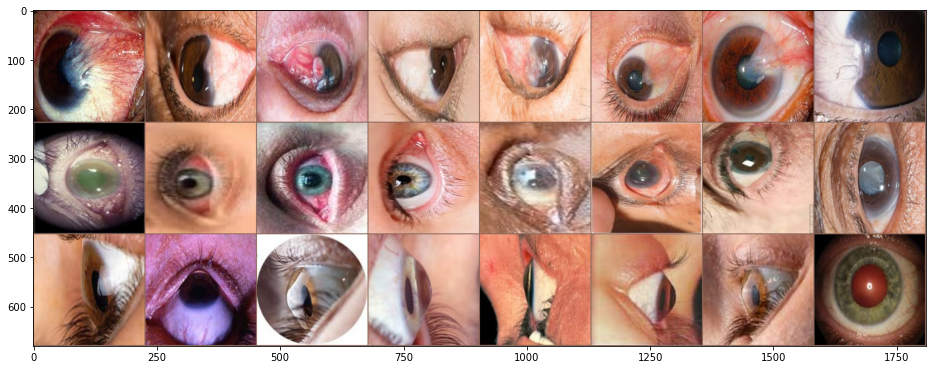

In [25]:
# As an example, lets pick a sample with the following
n_way = 3     # no. of classes --> Remember due to augmentation we now have 30 classes to sample from
n_support = 5 # no. of support images per class
n_query = 3   # no. of query images per class
sample_example = train_and_evaluation.extract_sample(n_way, n_support, n_query, x_train, y_train) #  returns a dictionary
train_and_evaluation.display_sample(sample_example['images'])
print(f"Class labels sampled: {sample_example['class_labels']}")

**9. Train a Prototypical Network using a fine-tuned base model**

In [28]:
model = prototypical_network.ProtoNet(densenet121_model, device)
model.to(device)

# you need to use a very low learning rate
basic_learning_rate = 0.0001

# we only want to update the layers that we unfroze in the model
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=basic_learning_rate/10)

n_way = 2       # n_way <= No. of unique classes in the validation set
n_support = 10   
n_query = 10

validation_episodes = 20
train_episodes = 20

max_epoch = 10

# name to save model as
filename = "DenseNet121-best-few-shot-model.pt"

train_loss_list, train_accuracy_list, validation_loss_list, validation_accuracy_list = train_and_evaluation.run_training_and_evaluation(model, x_train, y_train, x_val, y_val, n_way, n_support, n_query, train_episodes, validation_episodes, optimizer, max_epoch, filename)

Start training: 


Epoch 1 train:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 1 validation:   0%|          | 0/20 [00:00<?, ?it/s]


Epoch: 1
	Train Loss: 4.983 | Train Acc: 79.75%
	 Val. Loss: 2.491 | Val. Acc: 83.50%


Epoch 2 train:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 2 validation:   0%|          | 0/20 [00:00<?, ?it/s]


Epoch: 2
	Train Loss: 1.537 | Train Acc: 87.25%
	 Val. Loss: 4.408 | Val. Acc: 74.00%


Epoch 3 train:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 3 validation:   0%|          | 0/20 [00:00<?, ?it/s]


Epoch: 3
	Train Loss: 2.925 | Train Acc: 83.25%
	 Val. Loss: 4.480 | Val. Acc: 76.75%


Epoch 4 train:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 4 validation:   0%|          | 0/20 [00:00<?, ?it/s]


Epoch: 4
	Train Loss: 5.501 | Train Acc: 74.75%
	 Val. Loss: 3.847 | Val. Acc: 78.00%


Epoch 5 train:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 5 validation:   0%|          | 0/20 [00:00<?, ?it/s]


Epoch: 5
	Train Loss: 2.614 | Train Acc: 82.50%
	 Val. Loss: 2.176 | Val. Acc: 86.25%


Epoch 6 train:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 6 validation:   0%|          | 0/20 [00:00<?, ?it/s]


Epoch: 6
	Train Loss: 3.660 | Train Acc: 84.00%
	 Val. Loss: 2.509 | Val. Acc: 84.75%


Epoch 7 train:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 7 validation:   0%|          | 0/20 [00:00<?, ?it/s]


Epoch: 7
	Train Loss: 3.007 | Train Acc: 81.25%
	 Val. Loss: 3.558 | Val. Acc: 82.50%


Epoch 8 train:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 8 validation:   0%|          | 0/20 [00:00<?, ?it/s]


Epoch: 8
	Train Loss: 3.733 | Train Acc: 79.25%
	 Val. Loss: 2.437 | Val. Acc: 83.00%


Epoch 9 train:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 9 validation:   0%|          | 0/20 [00:00<?, ?it/s]


Epoch: 9
	Train Loss: 2.971 | Train Acc: 87.25%
	 Val. Loss: 5.760 | Val. Acc: 71.50%


Epoch 10 train:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 10 validation:   0%|          | 0/20 [00:00<?, ?it/s]


Epoch: 10
	Train Loss: 4.199 | Train Acc: 80.00%
	 Val. Loss: 3.601 | Val. Acc: 82.25%


**9b. Display Accuracy and Loss values**

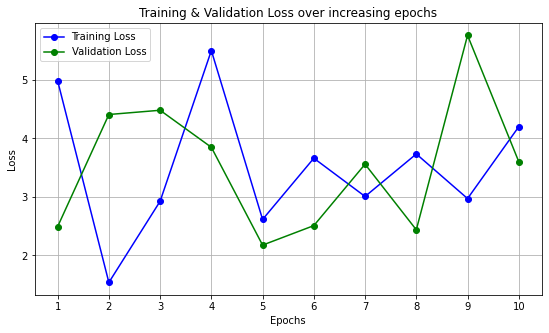

C:\conda_temp\ipykernel_14216\4126904873.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x * 100) for x in plt.gca().get_yticks()])


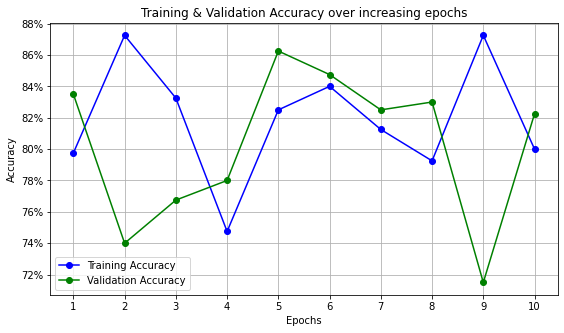

In [29]:
epochs = np.arange(max_epoch) + 1
plt.figure(figsize=(20, 5))
plt.subplot(121)
plt.title('Training & Validation Loss over increasing epochs')
plt.plot(epochs, train_loss_list,'bo-', label='Training Loss')
plt.plot(epochs, validation_loss_list,'go-', label='Validation Loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()

plt.figure(figsize=(20, 5))
plt.subplot(122)
plt.title('Training & Validation Accuracy over increasing epochs')
plt.plot(epochs, train_accuracy_list, 'bo-', label='Training Accuracy')
plt.plot(epochs, validation_accuracy_list, 'go-', label='Validation Accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x * 100) for x in plt.gca().get_yticks()])
plt.legend()
plt.grid('off')
plt.show()

**10. Save results to CSV file**

In [30]:
d = []

# loop through loss and accuracy values
for epoch, (train_loss, validation_loss, train_acc, validation_acc) in enumerate(zip(train_loss_list, validation_loss_list, train_accuracy_list, validation_accuracy_list)):
  
  d.append({"Epoch": epoch, "Training_Loss": train_loss, "Validation_loss": validation_loss, "Training_Acc": train_acc, "Validation_Acc": validation_acc})

In [31]:
temp_dataframe = pd.DataFrame(d)
temp_dataframe.head()

,Epoch,Training_Loss,Validation_loss,Training_Acc,Validation_Acc
0,0,4.983212,2.491380,0.7975,0.8350
1,1,1.537246,4.407671,0.8725,0.7400
2,2,2.924930,4.480270,0.8325,0.7675
3,3,5.500535,3.847303,0.7475,0.7800
4,4,2.614130,2.175506,0.8250,0.8625


In [32]:
# save Dataframe to CSV file
temp_dataframe.to_csv('DenseNet121-Acc-Loss.csv')

**11. Plot Loss and Accuracy for all models on one graph**

In [33]:
# read csv files into a pandas dataframes
DenseNet121_dataframe = pd.read_csv("C:\\Users\\Meet Sinojia\\Downloads\\Eye-Disease-Classification-Few-Shot-Learning-master\\Eye-Disease-Classification-Few-Shot-Learning-master//DenseNet121-Acc-Loss.csv")

In [34]:
# display the first 5 rows to make sure we have uploaded our data correctly
DenseNet121_dataframe.head()

,Unnamed: 0,Epoch,Training_Loss,Validation_loss,Training_Acc,Validation_Acc
0,0,0,4.983212,2.491380,0.7975,0.8350
1,1,1,1.537246,4.407671,0.8725,0.7400
2,2,2,2.924930,4.480270,0.8325,0.7675
3,3,3,5.500535,3.847303,0.7475,0.7800
4,4,4,2.614130,2.175506,0.8250,0.8625
